## Beginning: Credentials and Libraries

### Import libraries

In [1]:
#pip install pandas --upgrade

In [2]:
#pip install numpy --upgrade

In [3]:
#pip install seaborn --upgrade

In [4]:
#pip install matplot --upgrade

In [5]:
#from melitk.analytics.connectors.core.authentication import Authentication
#from melitk.analytics.connectors.teradata import ConnTeradata
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [6]:
#pd.set_option("display.max_columns", None)

### My path

In [7]:
import os
print(os.getcwd())

/Users/jucamuyrano/Documents/GitHub/Clusters-Protected-Users


## Upload Data Base

### API data form users

In [8]:
df_api = pd.read_csv(r'UsersAPI.csv')


In [9]:
df_api.shape

(8369, 6)

In [10]:
df_api.head(5)

,Unnamed: 0,id,registration_date,flag_internal,test_user,flag_on2
0,0,201114848,2015-12-16,0,0,0
1,1,79394233,2005-03-21,0,0,0
2,2,19524979,2007-06-09,0,0,0
3,3,171724486,2014-11-26,0,0,0
4,4,74937266,2004-08-03,0,0,0


### Upload data base from Teradata

In [11]:
df = pd.read_csv(r'ResWL.csv')

In [12]:
df.shape

(7848, 27)

In [13]:
df.head(5)

,CUS_CUST_ID,sit_site_id,cus_nickname,flag_on,flag_ca,flag_mia,flag_up,flag_trusted_seller,flag_gmv_high,flag_gmv_low,...,active_91_180,active_181_365,inactive,last_transaction,tpv_approved,gmv_not_refund,count_orders,cashout,gmv_claims_seller,count_claims_seller
0,201114848,MCO,NaN,0,0,0,1,0,0,0,...,1,0,0,2020-09-26,0.0000,0.00,0,0.00,0.00,0
1,79394233,MLB,TOROFFROAD,1,1,1,1,1,1,0,...,0,0,0,2021-03-21,104565.5113,149395.80,3147,99.64,17579.06,224
2,19524979,MLB,SJ ELETROIMPORTS,1,1,0,1,1,1,0,...,0,0,0,2021-03-21,67016.5128,102103.22,2389,1266.31,18153.92,231
3,171724486,MLB,MICHELINI PARTS,1,1,1,1,1,1,0,...,0,0,0,2021-03-21,89751.3989,133802.14,5694,373.52,13131.80,460
4,74937266,MLM,SKP_MX,1,1,1,1,1,1,0,...,0,0,0,2021-03-21,63727.4154,109327.71,2092,361.75,6433.09,125


### Upload data from BACEN

In [14]:
df_legales = pd.read_csv(r'base_legales.csv')

In [15]:
df_legales.shape

(1974, 1)

In [16]:
df_legales.head(5)

,cust_id
0,155261575
1,182644618
2,74162018
3,320253987
4,223316074


## Data Frame

### Left Join of API DB and Teradata DB to get DF Parcial 1

In [17]:
df_parcial_1=pd.merge(left = df_api, right = df,
                  how = 'left',
                  left_on='id', right_on='CUS_CUST_ID')

In [18]:
df_parcial_1.shape

(8369, 33)

### Left Join of DF Parcial 1 and BACEN DB to get DF Parcial 2

In [19]:
df_parcial_2=pd.merge(left = df_parcial_1, right = df_legales,
                  how = 'left',
                  left_on='id', right_on='cust_id')

In [20]:
df_parcial_2['cust_id'].fillna(0, inplace=True)

In [21]:
df_parcial_2.shape

(8369, 34)

In [22]:
df_parcial_2['cust_id'].fillna(0, inplace=True)

### Create column flag_legales

In [23]:
cond = df_parcial_2['cust_id']!=0
df_parcial_2['flag_legales']= 0
df_parcial_2.loc[cond,'flag_legales'] = 1

In [24]:
df_parcial_2.value_counts('flag_legales')

flag_legales
0    8209
1     160
dtype: int64

### Filter the BACEN users

In [25]:
df_parcial_3=df_parcial_2[df_parcial_2['flag_legales']==0]

In [26]:
df_parcial_3.shape

(8209, 35)

### Filter the internal users

In [27]:
df_parcial_4=df_parcial_3[df_parcial_3['flag_internal']==0]

In [28]:
df_parcial_4.shape

(8004, 35)

### Filter the test users

In [29]:
df_final=df_parcial_4[df_parcial_4['test_user']==0]

In [30]:
df_final.shape

(7483, 35)

In [31]:
df_final = df_final.reset_index(drop=True)

In [33]:
df_final.head(5)

,Unnamed: 0,id,registration_date,flag_internal,test_user,flag_on2,CUS_CUST_ID,sit_site_id,cus_nickname,flag_on,...,inactive,last_transaction,tpv_approved,gmv_not_refund,count_orders,cashout,gmv_claims_seller,count_claims_seller,cust_id,flag_legales
0,0,201114848,2015-12-16,0,0,0,201114848.0,MCO,NaN,0.0,...,0.0,2020-09-26,0.0000,0.00,0.0,0.00,0.00,0.0,0.0,0
1,1,79394233,2005-03-21,0,0,0,79394233.0,MLB,TOROFFROAD,1.0,...,0.0,2021-03-21,104565.5113,149395.80,3147.0,99.64,17579.06,224.0,0.0,0
2,2,19524979,2007-06-09,0,0,0,19524979.0,MLB,SJ ELETROIMPORTS,1.0,...,0.0,2021-03-21,67016.5128,102103.22,2389.0,1266.31,18153.92,231.0,0.0,0
3,3,171724486,2014-11-26,0,0,0,171724486.0,MLB,MICHELINI PARTS,1.0,...,0.0,2021-03-21,89751.3989,133802.14,5694.0,373.52,13131.80,460.0,0.0,0
4,4,74937266,2004-08-03,0,0,0,74937266.0,MLM,SKP_MX,1.0,...,0.0,2021-03-21,63727.4154,109327.71,2092.0,361.75,6433.09,125.0,0.0,0


In [34]:
df_final.columns

Index(['Unnamed: 0', 'id', 'registration_date', 'flag_internal', 'test_user',
       'flag_on2', 'CUS_CUST_ID', 'sit_site_id', 'cus_nickname', 'flag_on',
       'flag_ca', 'flag_mia', 'flag_up', 'flag_trusted_seller',
       'flag_gmv_high', 'flag_gmv_low', 'flag_tpv_high', 'flag_tpv_low',
       'flag_repu_ml', 'flag_repu_glg', 'flag_repu_yor', 'active_0_30',
       'active_31_90', 'active_91_180', 'active_181_365', 'inactive',
       'last_transaction', 'tpv_approved', 'gmv_not_refund', 'count_orders',
       'cashout', 'gmv_claims_seller', 'count_claims_seller', 'cust_id',
       'flag_legales'],
      dtype='object')

### Create column flago on final with users of the ON = 1

In [35]:
cond = df_final['flag_on']==1
cond2 = df_final['flag_on2'] == 1
cond3 = (cond) | (cond2)
df_final['flag_on_final']= 0
df_final.loc[cond3,'flag_on_final'] = 1

### Create column actividad with the active users = 1

In [36]:
cond = df_final['active_0_30']==1
cond2 = df_final['active_31_90'] == 1
cond3 = (cond) | (cond2)
df_final['activo']= 0
df_final.loc[cond3,'activo'] = 1

### Create column with users that have TPV null = 1

In [37]:
cond1 = df_final['tpv_approved'] == 0
df_final['tpv_nulo']= 0
df_final.loc[cond1,'tpv_nulo'] = 1

### Create column with users that have GMV null = 1

In [38]:
cond1 = df_final['gmv_not_refund'] == 0
df_final['gmv_nulo']= 0
df_final.loc[cond1,'gmv_nulo'] = 1

### Drope columns that are not needed in data frame

In [39]:
df_final.drop(columns=['cust_id','CUS_CUST_ID','test_user','flag_legales','flag_internal','Unnamed: 0','flag_on2','flag_on','active_0_30','active_31_90','active_91_180','active_181_365','inactive'], inplace = True)

### Change column name id to CUS_CUST_ID

In [40]:
df_final.rename(columns={'id': 'CUS_CUST_ID'}, inplace=True)

### Show the df_final

In [41]:
df_final.fillna(0, inplace=True)

In [42]:
df_final.columns

Index(['CUS_CUST_ID', 'registration_date', 'sit_site_id', 'cus_nickname',
       'flag_ca', 'flag_mia', 'flag_up', 'flag_trusted_seller',
       'flag_gmv_high', 'flag_gmv_low', 'flag_tpv_high', 'flag_tpv_low',
       'flag_repu_ml', 'flag_repu_glg', 'flag_repu_yor', 'last_transaction',
       'tpv_approved', 'gmv_not_refund', 'count_orders', 'cashout',
       'gmv_claims_seller', 'count_claims_seller', 'flag_on_final', 'activo',
       'tpv_nulo', 'gmv_nulo'],
      dtype='object')

In [43]:
df_final.head(5)

,CUS_CUST_ID,registration_date,sit_site_id,cus_nickname,flag_ca,flag_mia,flag_up,flag_trusted_seller,flag_gmv_high,flag_gmv_low,...,tpv_approved,gmv_not_refund,count_orders,cashout,gmv_claims_seller,count_claims_seller,flag_on_final,activo,tpv_nulo,gmv_nulo
0,201114848,2015-12-16,MCO,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0000,0.00,0.0,0.00,0.00,0.0,0,0,1,1
1,79394233,2005-03-21,MLB,TOROFFROAD,1.0,1.0,1.0,1.0,1.0,0.0,...,104565.5113,149395.80,3147.0,99.64,17579.06,224.0,1,1,0,0
2,19524979,2007-06-09,MLB,SJ ELETROIMPORTS,1.0,0.0,1.0,1.0,1.0,0.0,...,67016.5128,102103.22,2389.0,1266.31,18153.92,231.0,1,1,0,0
3,171724486,2014-11-26,MLB,MICHELINI PARTS,1.0,1.0,1.0,1.0,1.0,0.0,...,89751.3989,133802.14,5694.0,373.52,13131.80,460.0,1,1,0,0
4,74937266,2004-08-03,MLM,SKP_MX,1.0,1.0,1.0,1.0,1.0,0.0,...,63727.4154,109327.71,2092.0,361.75,6433.09,125.0,1,1,0,0


## Clustering Data Preparation

### Drop columns that are not required for the analyze

In [44]:
df_cluster=df_final.drop(columns=['last_transaction','registration_date','cashout','count_claims_seller','count_orders','cus_nickname','gmv_claims_seller','gmv_not_refund','sit_site_id','tpv_approved'])

In [45]:
df_cluster.columns

Index(['CUS_CUST_ID', 'flag_ca', 'flag_mia', 'flag_up', 'flag_trusted_seller',
       'flag_gmv_high', 'flag_gmv_low', 'flag_tpv_high', 'flag_tpv_low',
       'flag_repu_ml', 'flag_repu_glg', 'flag_repu_yor', 'flag_on_final',
       'activo', 'tpv_nulo', 'gmv_nulo'],
      dtype='object')

### Index the column CUS_CUST_ID

In [46]:
df_cluster.set_index('CUS_CUST_ID', inplace = True)

### Show the data for the clustering

In [47]:
df_cluster.head(5)

,flag_ca,flag_mia,flag_up,flag_trusted_seller,flag_gmv_high,flag_gmv_low,flag_tpv_high,flag_tpv_low,flag_repu_ml,flag_repu_glg,flag_repu_yor,flag_on_final,activo,tpv_nulo,gmv_nulo
CUS_CUST_ID,,,,,,,,,,,,,,,
201114848,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1
79394233,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0,0
19524979,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,0,0
171724486,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0,0
74937266,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0,0


## Clustering

### Looking the amount of clusters

In [48]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [49]:
from kmodes.kmodes import KModes

Text(0.5, 0, 'Cantidad de clusters')

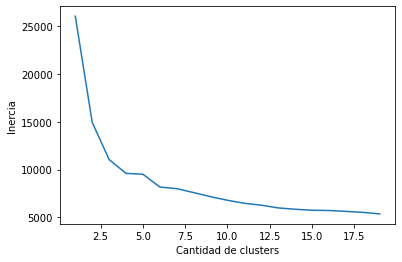

In [50]:
inercias = []
for i in range(1, 20):
    kmodes = KModes(n_clusters=i).fit(df_cluster)
    inercias.append(kmodes.cost_)
plt.plot(range(1, 20), inercias)
plt.ylabel('Inercia')
plt.xlabel('Cantidad de clusters')

 *Con el analisis del codo decidimos quedarnos con 3 clusters*

### Create the clusters

In [51]:
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

In [52]:
X = df_cluster.values
X = np.nan_to_num(X)

sc = StandardScaler()

cluster_data = sc.fit_transform(X)
print('Cluster data samples : ', cluster_data[:3])

Cluster data samples :  [[-1.68974237 -1.54465946  1.22857221 -1.89271333 -1.14467504 -0.53805709
  -1.49318694 -0.38751655 -1.37407209 -0.2635495  -0.35464211 -2.5958363
  -2.23195312  2.14110447  1.94932596]
 [ 0.59180619  0.64739188  1.22857221  0.52834203  0.87361038 -0.53805709
   0.66970851 -0.38751655  0.72776386 -0.2635495  -0.35464211  0.3852323
   0.44803809 -0.46704867 -0.51299784]
 [ 0.59180619 -1.54465946  1.22857221  0.52834203  0.87361038 -0.53805709
   0.66970851 -0.38751655 -1.37407209 -0.2635495   2.81974413  0.3852323
   0.44803809 -0.46704867 -0.51299784]]


In [53]:
clusters = 3
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12)
model.fit(X)

labels = model.labels_
print(labels[:100])

[1 0 0 0 0 0 0 0 0 2 0 2 2 0 2 2 1 0 0 0 0 0 0 0 1 0 0 2 0 2 1 2 0 0 2 0 2
 0 0 0 2 0 0 2 0 2 0 0 0 2 2 0 0 1 1 0 0 0 0 1 1 2 0 1 0 1 0 0 0 0 1 1 0 0
 2 0 2 1 1 2 0 1 0 1 1 0 2 2 0 0 0 1 0 0 0 2 2 1 1 0]


### Assign the clusters to each CUS_CUST_ID

In [54]:
df_cluster['cluster']=labels

In [55]:
df_cluster.shape

(7483, 16)

In [56]:
df_cluster = df_cluster.reset_index()

In [57]:
columns = ['CUS_CUST_ID','cluster']

In [58]:
df_bis = df_cluster[columns]

In [59]:

df_fin=pd.merge(left = df_final, right = df_bis,
                  how = 'left',
                  left_on='CUS_CUST_ID', right_on='CUS_CUST_ID')

### Shows the DF Final with there clusters

In [60]:
df_fin.head(5)

,CUS_CUST_ID,registration_date,sit_site_id,cus_nickname,flag_ca,flag_mia,flag_up,flag_trusted_seller,flag_gmv_high,flag_gmv_low,...,gmv_not_refund,count_orders,cashout,gmv_claims_seller,count_claims_seller,flag_on_final,activo,tpv_nulo,gmv_nulo,cluster
0,201114848,2015-12-16,MCO,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0,0,1,1,1
1,79394233,2005-03-21,MLB,TOROFFROAD,1.0,1.0,1.0,1.0,1.0,0.0,...,149395.80,3147.0,99.64,17579.06,224.0,1,1,0,0,0
2,19524979,2007-06-09,MLB,SJ ELETROIMPORTS,1.0,0.0,1.0,1.0,1.0,0.0,...,102103.22,2389.0,1266.31,18153.92,231.0,1,1,0,0,0
3,171724486,2014-11-26,MLB,MICHELINI PARTS,1.0,1.0,1.0,1.0,1.0,0.0,...,133802.14,5694.0,373.52,13131.80,460.0,1,1,0,0,0
4,74937266,2004-08-03,MLM,SKP_MX,1.0,1.0,1.0,1.0,1.0,0.0,...,109327.71,2092.0,361.75,6433.09,125.0,1,1,0,0,0


In [61]:
df_fin.columns

Index(['CUS_CUST_ID', 'registration_date', 'sit_site_id', 'cus_nickname',
       'flag_ca', 'flag_mia', 'flag_up', 'flag_trusted_seller',
       'flag_gmv_high', 'flag_gmv_low', 'flag_tpv_high', 'flag_tpv_low',
       'flag_repu_ml', 'flag_repu_glg', 'flag_repu_yor', 'last_transaction',
       'tpv_approved', 'gmv_not_refund', 'count_orders', 'cashout',
       'gmv_claims_seller', 'count_claims_seller', 'flag_on_final', 'activo',
       'tpv_nulo', 'gmv_nulo', 'cluster'],
      dtype='object')

### Graph the centroids

In [62]:
centers = np.array(model.cluster_centers_)

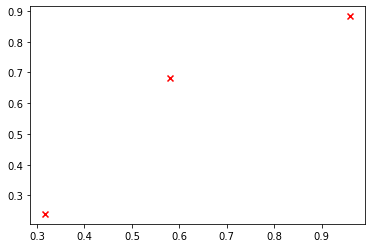

In [63]:
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')

In [64]:
model.labels_

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [65]:
df_fin.set_index('CUS_CUST_ID', inplace = True)

In [66]:
print(model.cluster_centers_)

[[ 9.59010601e-01  8.82921084e-01  5.35453475e-01  9.92932862e-01
   9.99057715e-01  7.49400542e-16  9.91048292e-01  8.95170789e-03
   9.49116608e-01  1.71967020e-02  3.29799764e-02  1.00000000e+00
   1.00000000e+00  2.33146835e-15  9.42285041e-04]
 [ 3.17859446e-01  2.39845261e-01  1.31528046e-01  1.18633140e-01
  -8.88178420e-16  1.09606705e-02  8.76853643e-02  6.18955513e-02
   7.73694391e-03  7.80141844e-02  1.19922631e-01  3.76531270e-01
   1.95357834e-01  8.50419084e-01  9.89039329e-01]
 [ 5.79727327e-01  6.83461766e-01  2.99347955e-01  8.60106698e-01
   1.77830468e-03  9.85773563e-01  4.87848251e-01  4.99703616e-01
   5.04445762e-01  1.73088322e-01  3.02311796e-01  1.00000000e+00
   9.98221695e-01  1.24481328e-02  1.24481328e-02]]


## Graph The Clusters

### gmv_not_refund vs tpv_approved

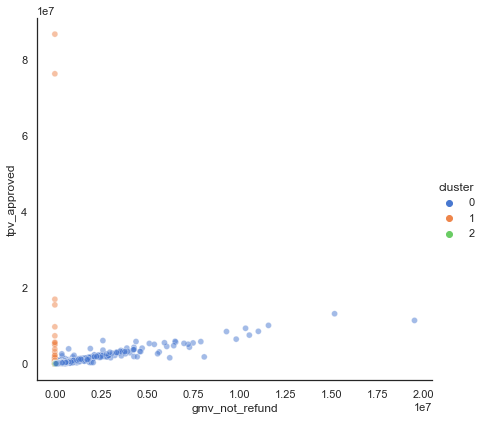

In [67]:
sns.set_theme(style="white")
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="gmv_not_refund", y="tpv_approved", hue="cluster",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_fin)

### count_orders vs count_claims_seller

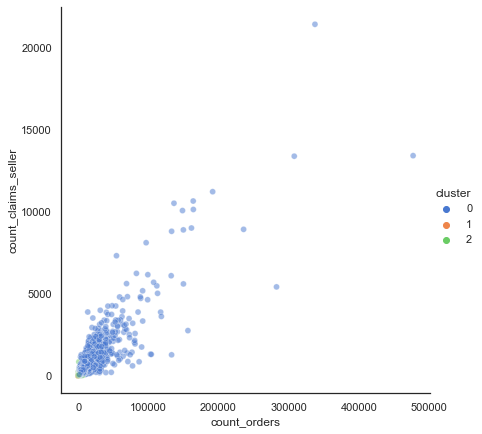

In [68]:
import seaborn as sns
sns.set_theme(style="white")
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="count_orders", y="count_claims_seller", hue="cluster",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_fin)

### count_orders vs tpv_approved

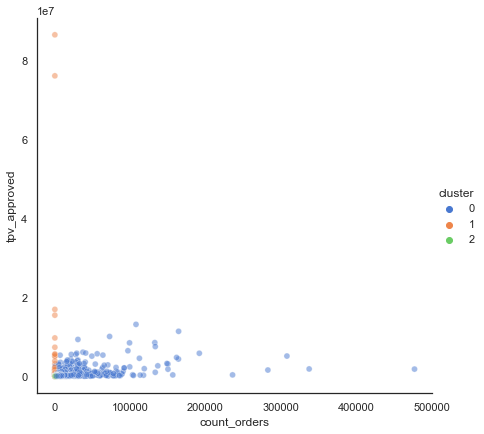

In [69]:
sns.set_theme(style="white")
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="count_orders", y="tpv_approved", hue="cluster",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_fin)

### flag_on_final vs tpv_approved

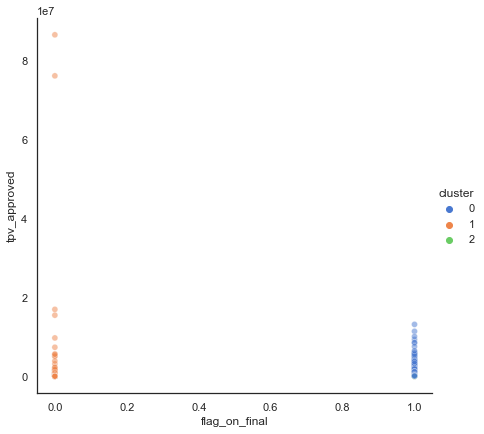

In [70]:
import seaborn as sns
sns.set_theme(style="white")
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="flag_on_final", y="tpv_approved", hue="cluster",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_fin)

### count_orders vs count_claims_seller vs flag_on_final

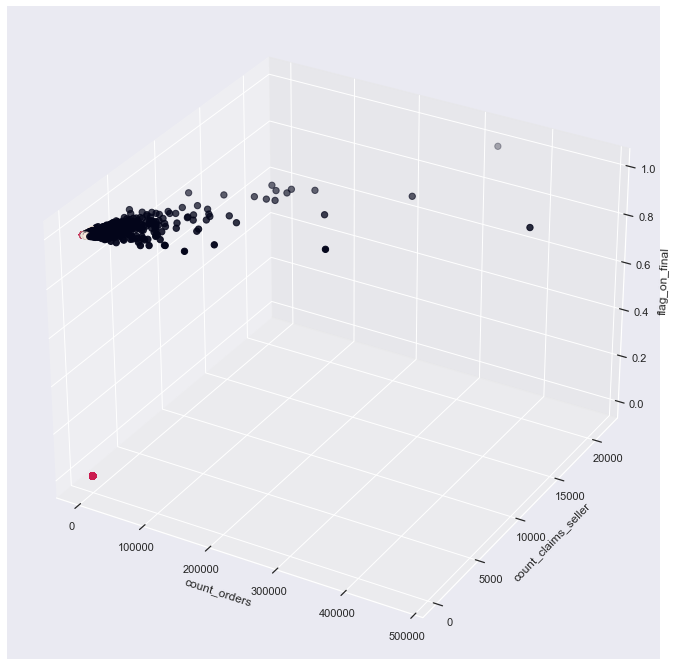

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection = '3d')

x = df_fin['count_orders']
y = df_fin['count_claims_seller']
z = df_fin['flag_on_final']

ax.set_xlabel("count_orders")
ax.set_ylabel("count_claims_seller")
ax.set_zlabel("flag_on_final")
ax.scatter(x, y, z,marker = 'o', c=df_fin["cluster"],s = 40)

## Analysis The Clusters

In [73]:
df_0=df_fin[df_fin['cluster']==0]
df_1=df_fin[df_fin['cluster']==1]
df_2=df_fin[df_fin['cluster']==2]

In [74]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1550 entries, 201114848 to 171271537
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   registration_date    1550 non-null   object 
 1   sit_site_id          1550 non-null   object 
 2   cus_nickname         1550 non-null   object 
 3   flag_ca              1550 non-null   float64
 4   flag_mia             1550 non-null   float64
 5   flag_up              1550 non-null   float64
 6   flag_trusted_seller  1550 non-null   float64
 7   flag_gmv_high        1550 non-null   float64
 8   flag_gmv_low         1550 non-null   float64
 9   flag_tpv_high        1550 non-null   float64
 10  flag_tpv_low         1550 non-null   float64
 11  flag_repu_ml         1550 non-null   float64
 12  flag_repu_glg        1550 non-null   float64
 13  flag_repu_yor        1550 non-null   float64
 14  last_transaction     1550 non-null   object 
 15  tpv_approved         1550

In [77]:
df_1.tpv_approved = df_1['tpv_approved'].astype(int)
df_1.gmv_not_refund = df_1['gmv_not_refund'].astype(int)
df_1.cashout = df_1['cashout'].astype(int)
df_1.gmv_not_refund = df_1['gmv_not_refund'].astype(int)


In [78]:
df_1.to_csv('cluster1.csv')

### Cluster size

In [79]:
df_0.shape

(4245, 26)

In [80]:
df_1.shape

(1550, 26)

In [81]:
df_2.shape

(1688, 26)

### Distribution users of the ON

In [82]:
df_fin['flag_on_final'].value_counts()

1    6516
0     967
Name: flag_on_final, dtype: int64

In [83]:
Activos_ON = df_fin.groupby(['cluster','flag_on_final']).size()
Activos_ON = Activos_ON.reset_index()
Activos_ON = pd.pivot_table(Activos_ON,columns='flag_on_final',index='cluster',values=0)
Activos_ON.fillna(0, inplace=True)
Activos_ON

flag_on_final,0,1
cluster,,
0,0.0,4245.0
1,967.0,583.0
2,0.0,1688.0


 *Tenemos aproximadamente 6500 usuarios que operan en el ON.*
 *En el cluster 0 y 2 tenemos users unicamente del ON mientras que en el cluster 1 tenemos un mix.*

### Distribution active users

In [84]:
df_fin['activo'].value_counts()

1    6232
0    1251
Name: activo, dtype: int64

In [85]:
Activos = df_fin.groupby(['cluster','activo']).size()
Activos = Activos.reset_index()
Activos = pd.pivot_table(Activos,columns='activo',index='cluster',values=0)
Activos.fillna(0, inplace=True)
Activos

activo,0,1
cluster,,
0,0.0,4245.0
1,1247.0,303.0
2,4.0,1684.0


 *Tenemos 1251 usuarios sin actividad en los ultimos 90 días.*
 *Con 1247 users, en el cluster 2 se encuentran el 99% de los usuarios sin actividad. En el cluster 1 tenemos 4 users y en el 2 ninguno.*

### Distribution users with CA

In [86]:
df_fin['flag_ca'].value_counts()

1.0    5542
0.0    1941
Name: flag_ca, dtype: int64

In [87]:
CA = df_fin.groupby(['cluster','flag_ca']).size()
CA = CA.reset_index()
CA = pd.pivot_table(CA,columns='flag_ca',index='cluster',values=0)
CA.fillna(0, inplace=True)
CA

flag_ca,0.0,1.0
cluster,,
0,174,4071
1,1057,493
2,710,978


 *Tenemos aproximadamente 5500 usuarios con cartera asesorada en WL*
 *Con 4071 users, en el cluster 2 se encuentra el 73% de los usuarios con CA.*

### Distribution users with credit

In [88]:
df_fin['flag_mia'].value_counts()

1.0    5273
0.0    2210
Name: flag_mia, dtype: int64

In [89]:
Adelantos = df_fin.groupby(['cluster','flag_mia']).size()
Adelantos = Adelantos.reset_index()
Adelantos = pd.pivot_table(Adelantos,columns='flag_mia',index='cluster',values=0)
Adelantos.fillna(0, inplace=True)
Adelantos

flag_mia,0.0,1.0
cluster,,
0,497,3748
1,1178,372
2,535,1153


 *Tenemos aproximadamente 5300 usuarios con adelantos activoss en WL*
 *Con 3748 users, en el cluster 2 se encuentra el 71% de los usuarios con adelantos. El resto se distribuye en partes similares dentro de los otros dos clusters*

### Distribution users with UP tag

In [90]:
df_fin['flag_up'].value_counts()

0.0    4501
1.0    2982
Name: flag_up, dtype: int64

In [91]:
UP = df_fin.groupby(['cluster','flag_up']).size()
UP = UP.reset_index()
UP = pd.pivot_table(UP,columns='flag_up',index='cluster',values=0)
UP.fillna(0, inplace=True)
UP

flag_up,0.0,1.0
cluster,,
0,1972,2273
1,1346,204
2,1183,505


 *Tenemos aproximadamente 3000 usuarios con tag UP dentro de la WL*
 *Con 2273 users, en el cluster 2 se encuentra el 76% de los usuarios con UP. El resto se distribuye en partes iguales dentro de los otros dos clusters*

### Distribution users with TPV High

In [92]:
df_fin['flag_tpv_high'].value_counts()

1.0    5166
0.0    2317
Name: flag_tpv_high, dtype: int64

In [93]:
TPV = df_fin.groupby(['cluster','flag_tpv_high']).size()
TPV = TPV.reset_index()
TPV = pd.pivot_table(TPV,columns='flag_tpv_high',index='cluster',values=0)
TPV.fillna(0, inplace=True)
TPV

flag_tpv_high,0.0,1.0
cluster,,
0,38,4207
1,1414,136
2,865,823


 *Tenemos aproximadamente 5150 usuarios con TPV HIGH dentro de la WL*
 *Con 4207 users, en el cluster 2 se encuentra el 81% de los usuarios con TPV HIGH.*

### Distribution users with GMV High

In [94]:
df_fin['flag_gmv_high'].value_counts()

1.0    4244
0.0    3239
Name: flag_gmv_high, dtype: int64

In [95]:
GMV = df_fin.groupby(['cluster','flag_gmv_high']).size()
GMV = GMV.reset_index()
GMV = pd.pivot_table(GMV,columns='flag_gmv_high',index='cluster',values=0)
GMV.fillna(0, inplace=True)
GMV

flag_gmv_high,0.0,1.0
cluster,,
0,4.0,4241.0
1,1550.0,0.0
2,1685.0,3.0


 *Tenemos aproximadamente 4250 usuarios con GMV HIGH dentro de la WL*
 *Con 4241 users, en el cluster 2 se encuentra el 99% de los usuarios con GMV HIGH.*

### Distribution Trusted Sellers

In [96]:
df_fin['flag_trusted_seller'].value_counts()

1.0    5850
0.0    1633
Name: flag_trusted_seller, dtype: int64

In [97]:
Trusted = df_fin.groupby(['cluster','flag_trusted_seller']).size()
Trusted = Trusted.reset_index()
Trusted = pd.pivot_table(Trusted,columns='flag_trusted_seller',index='cluster',values=0)
Trusted.fillna(0, inplace=True)
Trusted

flag_trusted_seller,0.0,1.0
cluster,,
0,30,4215
1,1367,183
2,236,1452


 *Tenemos 5850 Trusted Sellers dentro de la WL*
 *Con 4215 users, en el cluster 2 se encuentra el 72% de los usuarios con Trusted Sellers.*
 *El 99% de los users en el cluster 2 son Trusted Sellers*

## Conclusions

### Cluster 0: 
 *Este cluster cuenta con 1688 usuarios los cuales son unicamente del ON y practicamente todos ACTIVOS en los ultimos 90 días. En este cluster se enceuntran gran parte de los usuarios untrusted con TPV y GMV low o null. La mayrorai de estos users no son UP pero si tienen ADELANTOS activos.
Este cluster cuenta con los usuarios activos del ON mas chicos de la WL.*

### Cluster 1: 
*Este cluster cuenta con 1550 usuarios que son un mix entre ON y OFF. Gran parte de estos usarios estan INACTIVOS en los ultimos 90 días. En este cluster tenemos mayoria de usuarios UNTRUSTED con TPV y GMV low o null. La mayrorai de estos users no son UP ni tienen ADELANTOS activos.
El cluster 1 cuenta con la "basura" dentro de la WL ya que aca estan todos los usuarios inactivos.*

### Cluster 2: 
*Este cluster cuenta con 4245 usuarios los cuales son unicamente del ON y todos ACTIVOS en los ultimos 90 días. En este cluster practicamente todos los usuarios son TRUSTED con TPV y GMV high. Gran parte de los UP se encuentran dentro de este cluster y muchos de ellos tienen ADELANTOS activos.
El cluster 2 cuenta con los usuarios activos del ON mas grandes y con mayor confianza nuestra dentro de la WL. En este cluster tenemos a los mejores usuarios.*

### Cluster 3: 
*Este cluster cuenta con 886 usuarios. Aqui tenemos las exepciones de usuarios internos, test y que se encuentran en la lista de legales.*

## Sub Clustering Cluster 2

### Showing the DF 2

In [100]:
df_2.shape

(1688, 26)

In [101]:
df_2.head(5)

,registration_date,sit_site_id,cus_nickname,flag_ca,flag_mia,flag_up,flag_trusted_seller,flag_gmv_high,flag_gmv_low,flag_tpv_high,...,gmv_not_refund,count_orders,cashout,gmv_claims_seller,count_claims_seller,flag_on_final,activo,tpv_nulo,gmv_nulo,cluster
CUS_CUST_ID,,,,,,,,,,,,,,,,,,,,,
45790119,2008-02-27,MCO,DIAGNOSTIQ MEDICAL,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,12110.48,239.0,100.65,314.09,5.0,1,1,0,0,2
244903188,2017-02-22,MLB,GMCICAL,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,599.45,16.0,0.00,109.60,1.0,1,1,0,0,2
102979606,2012-02-16,MCO,DIGISMART.CO,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,367.08,32.0,0.00,14.23,2.0,1,1,0,0,2
167086628,2015-01-14,MLB,YASMIN BAZAR,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,10365.96,650.0,0.00,899.52,48.0,1,1,0,0,2
264717561,2017-07-17,MLM,BOOLCHANDSMX,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,9523.78,62.0,208.86,3442.50,13.0,1,1,0,0,2


In [102]:
df_2.columns

Index(['registration_date', 'sit_site_id', 'cus_nickname', 'flag_ca',
       'flag_mia', 'flag_up', 'flag_trusted_seller', 'flag_gmv_high',
       'flag_gmv_low', 'flag_tpv_high', 'flag_tpv_low', 'flag_repu_ml',
       'flag_repu_glg', 'flag_repu_yor', 'last_transaction', 'tpv_approved',
       'gmv_not_refund', 'count_orders', 'cashout', 'gmv_claims_seller',
       'count_claims_seller', 'flag_on_final', 'activo', 'tpv_nulo',
       'gmv_nulo', 'cluster'],
      dtype='object')

### Drop columns that are not required for the analyze

In [108]:
df_sub2=df_2.drop(columns=['registration_date','sit_site_id','cus_nickname','last_transaction','tpv_approved','gmv_not_refund','count_orders','cashout','gmv_claims_seller','count_claims_seller','cluster'])


In [109]:
df_sub2.columns

Index(['flag_ca', 'flag_mia', 'flag_up', 'flag_trusted_seller',
       'flag_gmv_high', 'flag_gmv_low', 'flag_tpv_high', 'flag_tpv_low',
       'flag_repu_ml', 'flag_repu_glg', 'flag_repu_yor', 'flag_on_final',
       'activo', 'tpv_nulo', 'gmv_nulo'],
      dtype='object')

## Sub Clustering

### Looking the amount of clusters

In [110]:
from kmodes.kmodes import KModes

Text(0.5, 0, 'Cantidad de clusters')

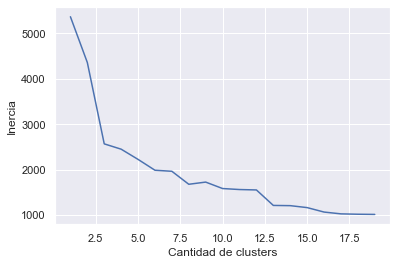

In [111]:
inercias = []
for i in range(1, 20):
    kmodes = KModes(n_clusters=i).fit(df_sub2)
    inercias.append(kmodes.cost_)
plt.plot(range(1, 20), inercias)
plt.ylabel('Inercia')
plt.xlabel('Cantidad de clusters')

### Creating the sub clusters 2

In [112]:
X = df_sub2.values
X = np.nan_to_num(X)

sc = StandardScaler()

cluster_data = sc.fit_transform(X)
print('Cluster data samples : ', cluster_data[:3])

Cluster data samples :  [[ 0.85203954  0.68118055  1.53054705  0.4031556  -0.04219497  0.12009612
  -0.97542047  1.00118554  0.99174027 -0.45735003 -0.65890411  0.
   0.04873702 -0.11491424 -0.1122385 ]
 [ 0.85203954 -1.46803957 -0.65336116  0.4031556  -0.04219497  0.12009612
  -0.97542047  1.00118554 -1.00832852 -0.45735003  1.51767151  0.
   0.04873702 -0.11491424 -0.1122385 ]
 [-1.17365446  0.68118055 -0.65336116  0.4031556  -0.04219497  0.12009612
  -0.97542047  1.00118554 -1.00832852 -0.45735003  1.51767151  0.
   0.04873702 -0.11491424 -0.1122385 ]]


In [113]:
clusters = 4
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12)
model.fit(X)

labels = model.labels_
print(labels[:100])

[3 0 0 1 3 1 0 3 2 1 2 0 2 1 3 1 1 0 1 1 0 1 0 2 3 1 1 3 1 0 0 1 1 1 1 3 1
 1 1 1 0 2 1 3 2 2 2 2 0 1 3 3 3 0 1 2 1 1 0 3 1 2 3 0 1 2 1 1 1 1 0 1 2 0
 1 1 3 0 1 1 0 1 2 0 0 1 1 0 0 2 3 0 3 3 1 2 1 3 2 0]


### Assign the clusters to each CUS_CUST_ID

In [116]:
df_sub2['sub_cluster']=labels

In [117]:
df_sub2.shape

(1688, 16)

In [118]:
df_sub2 = df_sub2.reset_index()

In [119]:
columns = ['CUS_CUST_ID','sub_cluster']

In [120]:
df_sub_bis2 = df_sub2[columns]

In [121]:
df_sub2_fin=pd.merge(left = df_2, right = df_sub_bis2,
                  how = 'left',
                  left_on='CUS_CUST_ID', right_on='CUS_CUST_ID')

### Show the data of de sub cluster

In [122]:
df_sub2_fin.head(5)

,CUS_CUST_ID,registration_date,sit_site_id,cus_nickname,flag_ca,flag_mia,flag_up,flag_trusted_seller,flag_gmv_high,flag_gmv_low,...,count_orders,cashout,gmv_claims_seller,count_claims_seller,flag_on_final,activo,tpv_nulo,gmv_nulo,cluster,sub_cluster
0,45790119,2008-02-27,MCO,DIAGNOSTIQ MEDICAL,1.0,1.0,1.0,1.0,0.0,1.0,...,239.0,100.65,314.09,5.0,1,1,0,0,2,3
1,244903188,2017-02-22,MLB,GMCICAL,1.0,0.0,0.0,1.0,0.0,1.0,...,16.0,0.00,109.60,1.0,1,1,0,0,2,0
2,102979606,2012-02-16,MCO,DIGISMART.CO,0.0,1.0,0.0,1.0,0.0,1.0,...,32.0,0.00,14.23,2.0,1,1,0,0,2,0
3,167086628,2015-01-14,MLB,YASMIN BAZAR,0.0,1.0,0.0,1.0,0.0,1.0,...,650.0,0.00,899.52,48.0,1,1,0,0,2,1
4,264717561,2017-07-17,MLM,BOOLCHANDSMX,1.0,0.0,0.0,1.0,0.0,1.0,...,62.0,208.86,3442.50,13.0,1,1,0,0,2,3


In [123]:
df_sub2_fin.columns

Index(['CUS_CUST_ID', 'registration_date', 'sit_site_id', 'cus_nickname',
       'flag_ca', 'flag_mia', 'flag_up', 'flag_trusted_seller',
       'flag_gmv_high', 'flag_gmv_low', 'flag_tpv_high', 'flag_tpv_low',
       'flag_repu_ml', 'flag_repu_glg', 'flag_repu_yor', 'last_transaction',
       'tpv_approved', 'gmv_not_refund', 'count_orders', 'cashout',
       'gmv_claims_seller', 'count_claims_seller', 'flag_on_final', 'activo',
       'tpv_nulo', 'gmv_nulo', 'cluster', 'sub_cluster'],
      dtype='object')

### Grafico los centroides

In [124]:
centers = np.array(model.cluster_centers_)

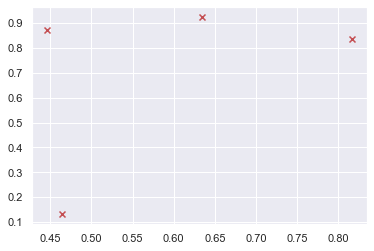

In [125]:
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')

In [126]:
model.labels_

array([3, 0, 0, ..., 0, 3, 1], dtype=int32)

In [127]:
df_sub2_fin.set_index('CUS_CUST_ID', inplace = True)

In [128]:
print(model.cluster_centers_)

[[ 4.64668094e-01  1.30620985e-01  2.01284797e-01  6.10278373e-01
   4.28265525e-03  9.93576017e-01  1.71306210e-01  7.94432548e-01
   5.55111512e-16  1.94289029e-16  9.74304069e-01  1.00000000e+00
   9.95717345e-01  3.42612420e-02  2.14132762e-03]
 [ 6.33781764e-01  9.25261584e-01  4.21524664e-01  9.92526158e-01
  -2.60208521e-18  9.89536622e-01  1.00000000e+00 -1.11022302e-16
   9.10313901e-01  1.11022302e-16  8.37070254e-02  1.00000000e+00
   1.00000000e+00  1.73472348e-18  1.04633782e-02]
 [ 4.46254072e-01  8.72964169e-01  1.92182410e-01  8.56677524e-01
   3.25732899e-03  9.54397394e-01  2.41042345e-01  7.39413681e-01
   2.22044605e-16  9.51140065e-01  1.66533454e-16  1.00000000e+00
   9.93485342e-01  1.95439739e-02  4.23452769e-02]
 [ 8.16326531e-01  8.36734694e-01  2.85714286e-01  9.79591837e-01
   4.33680869e-19  1.00000000e+00 -2.77555756e-16  1.00000000e+00
   9.87755102e-01  1.11022302e-16  1.66533454e-16  1.00000000e+00
   1.00000000e+00  0.00000000e+00  5.20417043e-18]]


## Analysis The Sub Clusters

In [129]:
df_s0=df_sub2_fin[df_sub2_fin['sub_cluster']==0]
df_s1=df_sub2_fin[df_sub2_fin['sub_cluster']==1]
df_s2=df_sub2_fin[df_sub2_fin['sub_cluster']==2]
df_s3=df_sub2_fin[df_sub2_fin['sub_cluster']==3]

### Size of de sub clusters

In [130]:
df_sub2_fin['sub_cluster'].value_counts()

1    669
0    467
2    307
3    245
Name: sub_cluster, dtype: int64

### Distribution of the active users

In [131]:
df_sub2_fin['activo'].value_counts()

1    1684
0       4
Name: activo, dtype: int64

In [132]:
sub2 = df_sub2_fin.groupby(['sub_cluster','activo']).size()
sub2 = sub2.reset_index()
sub2 = pd.pivot_table(sub2,columns='activo',index='sub_cluster',values=0)
sub2.fillna(0, inplace=True)
sub2

activo,0,1
sub_cluster,,
0,2.0,465.0
1,0.0,669.0
2,2.0,305.0
3,0.0,245.0


*Tenemos solo 4 usuarios sin actividad en los ultimos 90 dias. Dos de ellos estan en el sub cluster 0 y otros dos en el sub cluster 1*

### Distribution Trusted Sellers

In [133]:
df_sub2_fin['flag_trusted_seller'].value_counts()

1.0    1452
0.0     236
Name: flag_trusted_seller, dtype: int64

In [134]:
sub2 = df_sub2_fin.groupby(['sub_cluster','flag_trusted_seller']).size()
sub2 = sub2.reset_index()
sub2 = pd.pivot_table(sub2,columns='flag_trusted_seller',index='sub_cluster',values=0)
sub2.fillna(0, inplace=True)
sub2

flag_trusted_seller,0.0,1.0
sub_cluster,,
0,182,285
1,5,664
2,44,263
3,5,240


*Los sub cluster 2 y 3 contienen practicamente solo tusted sellers*

### Distribution UP

In [135]:
df_sub2_fin['flag_up'].value_counts()

0.0    1183
1.0     505
Name: flag_up, dtype: int64

In [136]:
sub2 = df_sub2_fin.groupby(['sub_cluster','flag_up']).size()
sub2 = sub2.reset_index()
sub2 = pd.pivot_table(sub2,columns='flag_up',index='sub_cluster',values=0)
sub2.fillna(0, inplace=True)
sub2

flag_up,0.0,1.0
sub_cluster,,
0,373,94
1,387,282
2,248,59
3,175,70


*En el sub cluster 2 se encuentran mas de la mnitad de los sellers con tag UP*

### Distribution CA

In [137]:
df_sub2_fin['flag_ca'].value_counts()

1.0    978
0.0    710
Name: flag_ca, dtype: int64

In [139]:
sub2 = df_sub2_fin.groupby(['sub_cluster','flag_ca']).size()
sub2 = sub2.reset_index()
sub2 = pd.pivot_table(sub2,columns='flag_ca',index='sub_cluster',values=0)
sub2.fillna(0, inplace=True)
sub2

flag_ca,0.0,1.0
sub_cluster,,
0,250,217
1,245,424
2,170,137
3,45,200


### Distribution Adelantos

In [141]:
df_sub2_fin['flag_mia'].value_counts()

1.0    1153
0.0     535
Name: flag_mia, dtype: int64

In [142]:
sub2 = df_sub2_fin.groupby(['sub_cluster','flag_mia']).size()
sub2 = sub2.reset_index()
sub2 = pd.pivot_table(sub2,columns='flag_mia',index='sub_cluster',values=0)
sub2.fillna(0, inplace=True)
sub2

flag_mia,0.0,1.0
sub_cluster,,
0,406,61
1,50,619
2,39,268
3,40,205


### Distribution TPV High

In [143]:
df_sub2_fin['flag_tpv_high'].value_counts()

0.0    865
1.0    823
Name: flag_tpv_high, dtype: int64

In [145]:
sub2 = df_sub2_fin.groupby(['sub_cluster','flag_tpv_high']).size()
sub2 = sub2.reset_index()
sub2 = pd.pivot_table(sub2,columns='flag_tpv_high',index='sub_cluster',values=0)
sub2.fillna(0, inplace=True)
sub2

flag_tpv_high,0.0,1.0
sub_cluster,,
0,387.0,80.0
1,0.0,669.0
2,233.0,74.0
3,245.0,0.0


*El 100% de los users del sub cluster 2 son de TPV HIGH.*

### Distribution GMV High

In [146]:
df_sub2_fin['flag_gmv_high'].value_counts()

0.0    1685
1.0       3
Name: flag_gmv_high, dtype: int64

In [147]:
sub2 = df_sub2_fin.groupby(['sub_cluster','flag_gmv_high']).size()
sub2 = sub2.reset_index()
sub2 = pd.pivot_table(sub2,columns='flag_gmv_high',index='sub_cluster',values=0)
sub2.fillna(0, inplace=True)
sub2

flag_gmv_high,0.0,1.0
sub_cluster,,
0,465.0,2.0
1,669.0,0.0
2,306.0,1.0
3,245.0,0.0


*Practicamente tdoos son de GMV Low, esto nos indica que en el cluster 0 los users son que tenemos son chicos dentro del ON*
*Auneque todos son de GMV Low, muchos de los sellers son de TPV High. Esto nos quiere decir que muchos de estos usuarios aunque no sean grandes en el ON si lo son para el OFF*

### Behaviour GMV y Cashout

#### Cashout

In [148]:
gra = df_sub2_fin[['sub_cluster','cashout']].groupby('sub_cluster').mean()
gra

,cashout
sub_cluster,
0,33.311306
1,120.739776
2,16.045277
3,76.898367


<AxesSubplot:title={'center':'Media CashOut'}, xlabel='sub_cluster'>

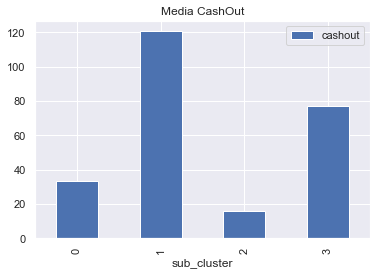

In [149]:
gra.plot(kind = 'bar',
            title = 'Media CashOut')

#### GMV

In [150]:
gra = df_sub2_fin[['sub_cluster','gmv_not_refund']].groupby('sub_cluster').mean()
gra

,gmv_not_refund
sub_cluster,
0,6834.708822
1,34545.612466
2,4921.021987
3,14149.900857


<AxesSubplot:title={'center':'Media GMV'}, xlabel='sub_cluster'>

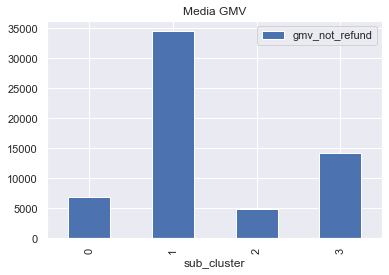

In [151]:
gra.plot(kind = 'bar',
            title = 'Media GMV')

#### Ratio CO / GMV

In [152]:
gra = df_sub2_fin[['sub_cluster','gmv_not_refund','cashout']].groupby('sub_cluster').sum()
gra

,gmv_not_refund,cashout
sub_cluster,,
0,3191809.02,15556.38
1,23111014.74,80774.91
2,1510753.75,4925.90
3,3466725.71,18840.10


In [153]:
gra['ratio'] = (gra['cashout']/gra['gmv_not_refund'])*100
gra

,gmv_not_refund,cashout,ratio
sub_cluster,,,
0,3191809.02,15556.38,0.487384
1,23111014.74,80774.91,0.349508
2,1510753.75,4925.90,0.326056
3,3466725.71,18840.10,0.543455


## Conclusions Sub Clustering 0
#### Sub Cluster 0:
*Con 307 usuarios, en este sub cluster tenemos un 83% de trusted sellers. Aqui no tenemos usuarios con GMV high pero si el 19% tiene TPV high. En este sub cluster tenemos un 14% de usuarios UP pero un 88% de usuarios con adelantos. Este sub cluster cuenta con los seller con menos ratio de CO/GMV. En este sub cluster tenemos los trusted sellers chicos mas lindos.*
#### Sub Cluster 1:
*En este sub cluster tenemos 669 usuarios de los cuales practicamente todos son trusted sellers. En este cluster todos los selles son de GMV low pero de TPV high. Solo el 44% de ellos son UPs pero el 92% tienen adelantos activos. Aqui tenemos 424 usuarios que pertenecen a la cartera asesorada. Este sub cluster tiene los mejores usuarios del cluster 0 los cuales a pesar de no ser grandes en el ON si lo son en el OFF.*
#### Sub Cluster 2:
*Este sub cluster cuenta con 467 usuarios de los cuales solo el 61% de ellos son trusted sellers. Aqui todos los usuarios son de GMV low y pocos de ellos tiene TPV high. Solo el 20% de los usuarios son UPs y el 13% tiene adelantos acticvos. Menos de la mitada de estos usuarios son asesorados.
En este sub cluster se encuentran los peores uisuarios del clsuter 0*
#### Sub Cluster 3:
*Este sub cluster cuenta con 245 usuarios de los cuales practicamente todos son trusted sellers. Los usuarios de este sub cluster estan todos activos pero son de TPV y GMV low. Solo el 29% de los usuarios son UPs pero el 84% de ellos tienen activos los adelantos. En este sub cluster el 81% de los usuarios pertenecen a la cartera asesorada. Aqui tenemos el clsuter con mayor ratio de CO/GMV.
Este sub cluster cuenta con los usuarios trusted sellers mas grises.*